In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn . linear_model import LinearRegression
from sklearn . preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns

In [2]:
train_df = pd.read_csv("Train.csv")
valid_df = pd.read_csv("Validation.csv")
test_df = pd.read_csv("Test.csv")

In [3]:
X_train = train_df.iloc[:,0:1]
y_train = train_df.iloc[:,1]

X_valid = valid_df.iloc[:,0:1]
y_valid = valid_df.iloc[:,1]

X_test = test_df.iloc[:,0:1]
y_test = test_df.iloc[:,1]

### Polynomial Curve Fitting

-------------------Degree =  2 ---------------------
RMSE Train: 0.7529136705201348
RMSE Validation: 0.7420426181948163
-------------------Degree =  3 ---------------------
RMSE Train: 0.7525812636134244
RMSE Validation: 0.7410896060604715
-------------------Degree =  4 ---------------------
RMSE Train: 0.7524027861046039
RMSE Validation: 0.7407120422998238
-------------------Degree =  5 ---------------------
RMSE Train: 0.7524009356563661
RMSE Validation: 0.7404792351946756


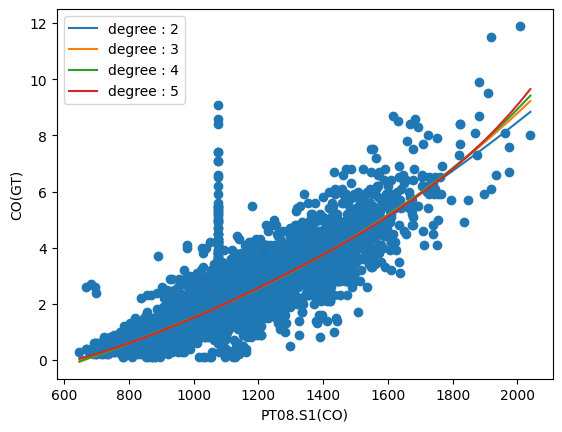

In [4]:
degrees = [2,3,4,5]
min_rmse = 999999
rmse = []
for p in degrees:
    polynomial_features = PolynomialFeatures(degree = p)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_valid_poly = polynomial_features.transform(X_valid)
    
    regressor = LinearRegression ()
    regressor.fit(X_train_poly, y_train)

    y_train_pred = regressor.predict(X_train_poly)
    y_valid_pred = regressor.predict(X_valid_poly)

    RMSE_train = math.sqrt(mean_squared_error(y_train,y_train_pred))
    RMSE_valid = math.sqrt(mean_squared_error(y_valid,y_valid_pred))
    print("-------------------Degree = ", p, "---------------------")
    print(f'RMSE Train: {RMSE_train}\nRMSE Validation: {RMSE_valid}')
    rmse.append(RMSE_valid)
    if (RMSE_valid < min_rmse):
        best_rmse = RMSE_valid
        best_poly_features = polynomial_features
        best_regressor = regressor
        degree = p
    y_train_pred.sort()
    y_train_pred = pd.DataFrame(y_train_pred)
    X_trainData = train_df.iloc[:,0]
    plt.plot(sorted(X_trainData), y_train_pred, label = f'degree : {p}')
    plt.legend()
    plt.xlabel('PT08.S1(CO)')
    plt.ylabel('CO(GT)')
plt.scatter(X_trainData, y_train)
plt.show()    

In [5]:
X_test_poly = best_poly_features.transform(X_test)
y_test_pred = best_regressor.predict(X_test_poly)
RMSE_test = math.sqrt(mean_squared_error(y_test,y_test_pred))
print(f"RMSE Test: {RMSE_test} with degree: {degree}")

RMSE Test: 0.7884554149896129 with degree: 5


Text(0, 0.5, 'Predicted Test Values')

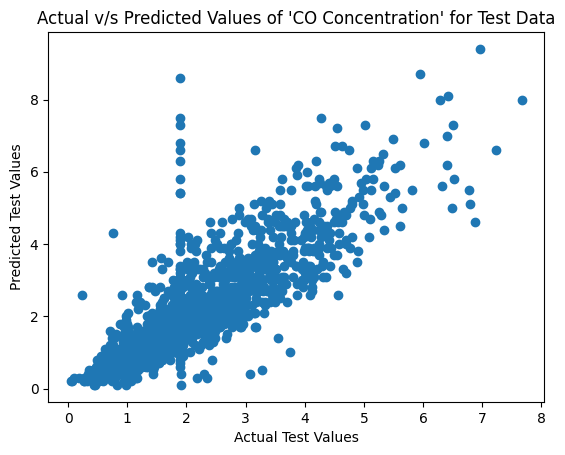

In [6]:
plt.scatter(y_test_pred, y_test)
plt.title("Actual v/s Predicted Values of 'CO Concentration' for Test Data")
plt.xlabel("Actual Test Values")
plt.ylabel("Predicted Test Values")

Text(0, 0.5, 'RMSE of Validation Data')

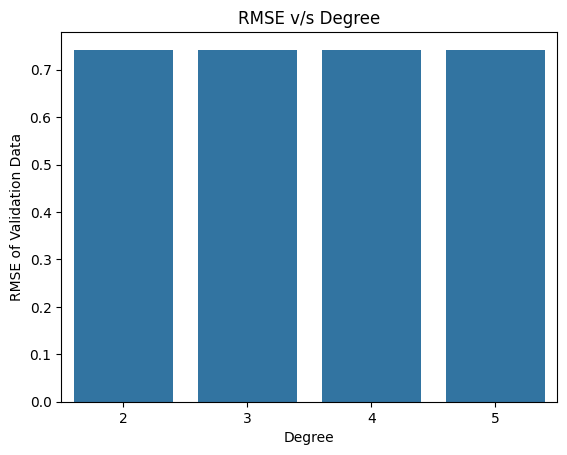

In [7]:
sns.barplot(x=degrees, y=rmse)
plt.title("RMSE v/s Degree")
plt.xlabel("Degree")
plt.ylabel("RMSE of Validation Data")